# ML - TASK2 😋

In [25]:
from colorama import Fore, Style
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import f1_score
import random
import copy

np.set_printoptions(legacy='1.25')


## Explore linearly seperable cluster of blobs

In [26]:
#create 5000 samples with two features and two centers (not overlapping)
X, y = datasets.make_blobs(n_samples=5000, n_features=2, centers=2, cluster_std=1.2, random_state=123)
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### plotting linearly-seperable clusters of blobs

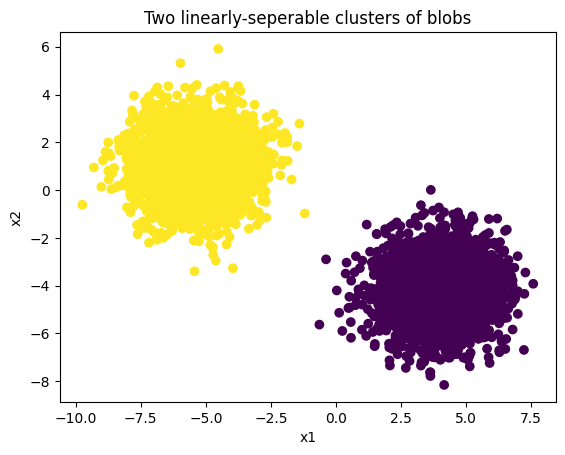

In [27]:
#split samples according to binarry classification
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

plt.title('Two linearly-seperable clusters of blobs')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


### Test perceptron accuracy VS linear SVM accuracy

In [28]:
p = Perceptron(eta0=0.1, n_iter_no_change=40)
p.fit(X_train, y_train)
y_predict = p.predict(X_test)
print(f"{Fore.YELLOW}perceptron accuracy {Style.RESET_ALL}for linearly-seperable data: {np.round(p.score(X_test, y_test) * 100, decimals=3)}%")

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print(f"{Fore.GREEN}SVM accuracy {Style.RESET_ALL}for linearly-seperable data: {np.round(svm.score(X_test, y_test) * 100, decimals=3)}%")

perceptron accuracy for linearly-seperable data: 100.0%
SVM accuracy for linearly-seperable data: 100.0%



### Plot Perceptron decision boundary

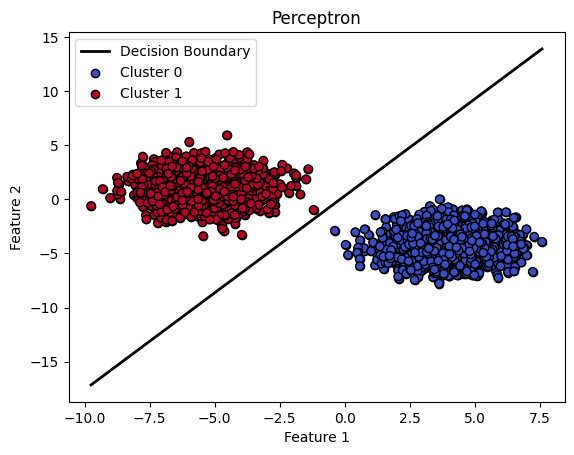

In [29]:
# Get the coefficients and intercept of the decision boundary
w = p.coef_[0]  # Weights
b = p.intercept_[0]  # Intercept
# Plot training and testing points
# Define the decision boundary line (w[0]*x + w[1]*y + b = 0)
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
x_values = np.linspace(x_min, x_max, 100)
y_values = -(w[0] * x_values + b) / w[1]  # Rearrange for y = (-w[0]*x - b) / w[1]

# Plot the decision boundary
plt.plot(x_values, y_values, color='black', linewidth=2, label="Decision Boundary")

# Define unique class labels and their colors
classes = np.unique(y_train)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(classes)))

# Plot the training data with class-specific labels
for class_label, color in zip(classes, colors):
    plt.scatter(
        X_train[y_train == class_label, 0], 
        X_train[y_train == class_label, 1], 
        color=color, 
        label=f"Cluster {class_label}", 
        edgecolor='k'
    )

# Plot the scatter points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')



plt.title("Perceptron")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


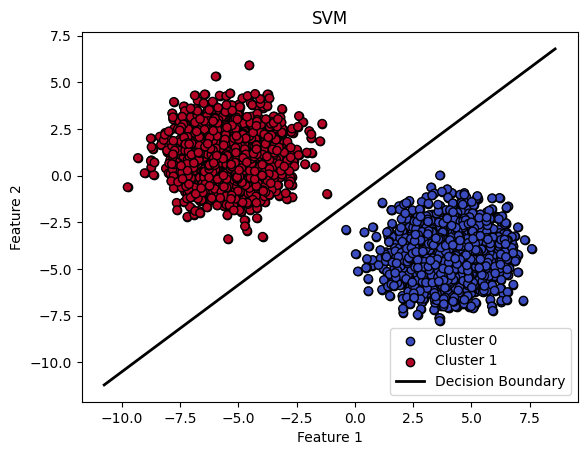

In [30]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

# Get the coefficients and intercept of the decision boundary
w = svm.coef_[0]  # Weights
b = svm.intercept_[0]  # Intercept
# Plot training and testing points
# Define the decision boundary line (w[0]*x + w[1]*y + b = 0)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x_values = np.linspace(x_min, x_max, 100)
y_values = -(w[0] * x_values + b) / w[1]  # Rearrange for y = (-w[0]*x - b) / w[1]

# Plot the training data with class-specific labels
for class_label, color in zip(classes, colors):
    plt.scatter(
        X_train[y_train == class_label, 0], 
        X_train[y_train == class_label, 1], 
        color=color, 
        label=f"Cluster {class_label}", 
        edgecolor='k'
    )


# Plot the decision boundary
plt.plot(x_values, y_values, color='black', linewidth=2, label="Decision Boundary")


# Plot the scatter points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')


plt.title("SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


### Conclusion:
SVM's decision boundary is centered while Perceptron's decision boundary isn't, \
however both models classify 100% of the samples currectly.

## Explore circular non-linearly seperable cluster of blobs

In [31]:
#create 5000 samples with two features and one center (overlapping)
X, y = datasets.make_circles(5000,noise=0.1, random_state=123)
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [32]:
p = Perceptron(eta0=0.1, n_iter_no_change=40)
p.fit(X_train, y_train)
y_predict = p.predict(X_test)
print(f"{Fore.YELLOW}perceptron accuracy {Style.RESET_ALL}for non-linearly-seperable data: {np.round(p.score(X_test, y_test) * 100, decimals=3)}%")

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print(f"{Fore.GREEN}SVM accuracy {Style.RESET_ALL}for non-linearly-seperable data: {np.round(svm.score(X_test, y_test) * 100, decimals=3)}%")

perceptron accuracy for non-linearly-seperable data: 46.4%
SVM accuracy for non-linearly-seperable data: 48.1%


### plotting non-linearly-seperable circular clusters of blobs

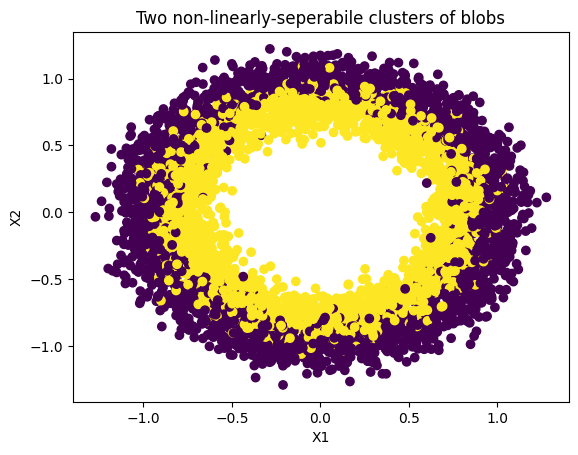

In [33]:
#split samples according to binarry classification
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
plt.title('Two non-linearly-seperabile clusters of blobs')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


### Plot Perceptron decision boundary

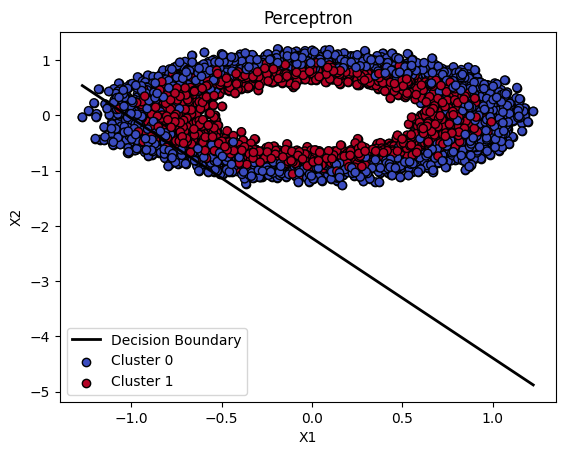

In [34]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

# Get the coefficients and intercept of the decision boundary
w = p.coef_[0]  # Weights
b = p.intercept_[0]  # Intercept
# Plot training and testing points
# Define the decision boundary line (w[0]*x + w[1]*y + b = 0)
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max() 
x_values = np.linspace(x_min, x_max, 100)
y_values = -(w[0] * x_values + b) / w[1]  # Rearrange for y = (-w[0]*x - b) / w[1]

# Plot the decision boundary
plt.plot(x_values, y_values, color='black', linewidth=2, label="Decision Boundary")

# Define unique class labels and their colors
classes = np.unique(y_train)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(classes)))

# Plot the training data with class-specific labels
for class_label, color in zip(classes, colors):
    plt.scatter(
        X_train[y_train == class_label, 0], 
        X_train[y_train == class_label, 1], 
        color=color, 
        label=f"Cluster {class_label}", 
        edgecolor='k'
    )

# Plot the scatter points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')



plt.title("Perceptron")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


### Plot SVM decision boundary

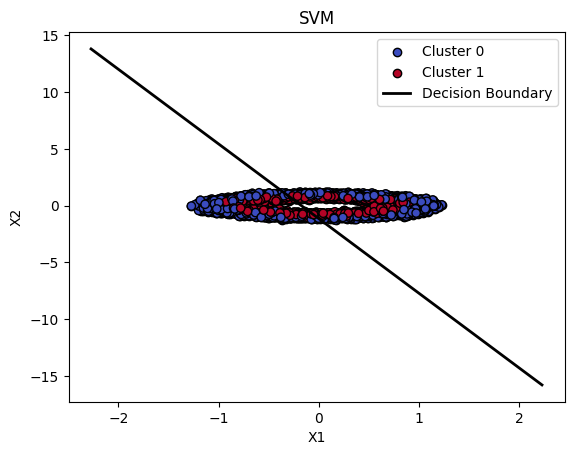

In [35]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

# Get the coefficients and intercept of the decision boundary
w = svm.coef_[0]  # Weights
b = svm.intercept_[0]  # Intercept
# Plot training and testing points
# Define the decision boundary line (w[0]*x + w[1]*y + b = 0)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x_values = np.linspace(x_min, x_max, 100)
y_values = -(w[0] * x_values + b) / w[1]  # Rearrange for y = (-w[0]*x - b) / w[1]

# Plot the training data with class-specific labels
for class_label, color in zip(classes, colors):
    plt.scatter(
        X_train[y_train == class_label, 0], 
        X_train[y_train == class_label, 1], 
        color=color, 
        label=f"Cluster {class_label}", 
        edgecolor='k'
    )


# Plot the decision boundary
plt.plot(x_values, y_values, color='black', linewidth=2, label="Decision Boundary")


# Plot the scatter points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')


plt.title("SVM")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


### Conclusion:
SVM's decision boundary is centered while Perceptron's decision boundary isn't, \
however, both models tested poorly with <span style="color:red">error_rate</span> > 50% (less then chance)



### Cross validating diffrent SVM kernels performances

In [36]:

# Define different kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Perform cross-validation for each kernel
for kernel in kernels:
    svc = SVC(kernel=kernel)
    f1_scores = cross_val_score(svc, X_train, y_train , cv=5, scoring='f1')  # 5-fold cross-validation
    print(f"Kernel: {kernel}, Mean F1 Score: {f1_scores.mean():.4f}, Std: {f1_scores.std():.4f}")

Kernel: linear, Mean F1 Score: 0.5653, Std: 0.0545
Kernel: poly, Mean F1 Score: 0.6773, Std: 0.0173
Kernel: rbf, Mean F1 Score: 0.8363, Std: 0.0078
Kernel: sigmoid, Mean F1 Score: 0.5142, Std: 0.0310


### Plotting the highest scorers - rbf and poly


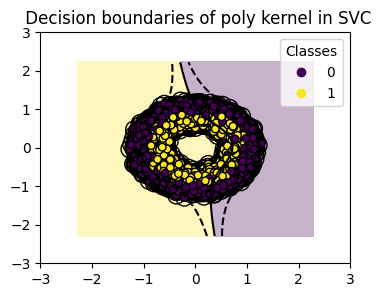

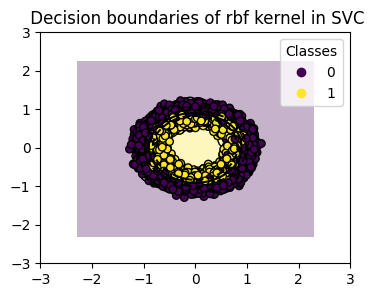

In [37]:
def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

plot_training_data_with_decision_boundary(kernel="poly", ax=None, long_title=True, support_vectors=True)
plot_training_data_with_decision_boundary(kernel="rbf", ax=None, long_title=True, support_vectors=True)

### Conclusions:
The plots approve that the cross-validation-f1-score-test results, e.g. rbf kernel classify the data better then poly kernel.




### Data Augmentation

Kernel type: rbf
F1-score over 5-fold cross validation (f1_mean,f1_std): (0.8332538115890278, 0.015878333443106234)
Kernel type: rbf
Noise params (mean,std): (0, 0.5) 
F1-score over k iterations (f1_mean,f1_std): (0.5627996214512634, 0.014984056001859277)
Kernel type: rbf
Noise params (mean,std): (0, 1) 
F1-score over k iterations (f1_mean,f1_std): (0.4811086416408138, 0.01743214435537812)


C:\Users\mcole\AppData\Local\Temp\ipykernel_26520\1116824128.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(f1_scores, patch_artist=True,


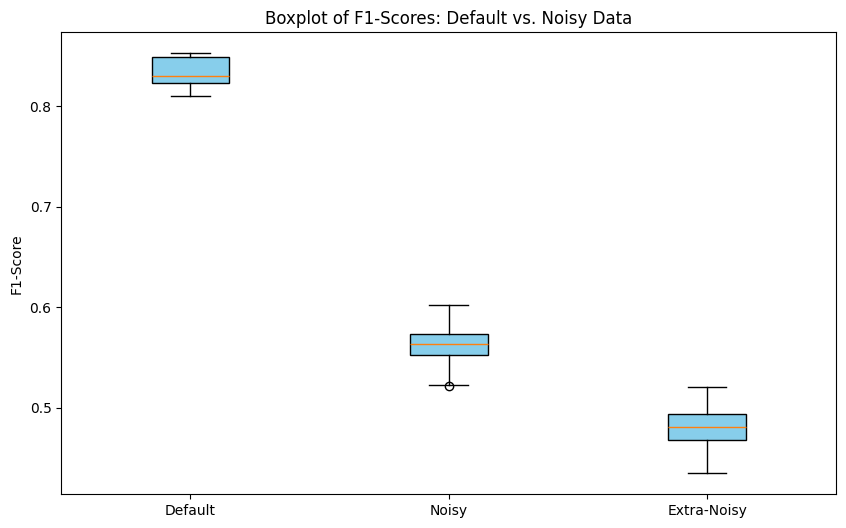

In [38]:
def get_avg_f1_score_of_SVM(kernel="rbf", noise_level=0, gaussian_noise=True):
    # Generate the original Circular dataset
    X, y = datasets.make_circles(5000,noise=0.1, random_state=123) 
    # Train an SVM on the original dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    
    f1_scores = []     # Storage for F1-scores
    if not gaussian_noise:
        y_pred = svm_model.predict(X_test)
        f1_scores = cross_val_score(svm_model, X_train, y_train , cv=5, scoring='f1')  # 5-fold cross-validation

    else:
        n_samples = 1000  # Number of data points to sample
        k = 150           # Number of iterations
        mean = 0          # Mean for Gaussian nois
        std = noise_level # Standard deviation
        # Repeat the augmentation process k times
        for _ in range(k):
            # Step 1: Sample 1000 points
            indices = np.random.choice(range(len(X)), n_samples, replace=False)
            X_sampled, y_sampled = X[indices], y[indices]
            # Step 2: Add Gaussian noise
            noise = np.random.normal(mean, std, X_sampled.shape)
            X_noisy = X_sampled + noise
            # Step 3: Test the SVM model and calculate the F1-score
            y_pred = svm_model.predict(X_noisy)
            f1 = f1_score(y_sampled, y_pred, average='weighted')
            f1_scores.append(f1)

    # Summary Statistics
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)

    print(f"Kernel type: {Fore.GREEN}{kernel}")
    if not gaussian_noise:
        print(f"{Style.RESET_ALL}F1-score over 5-fold cross validation (f1_mean,f1_std): {Fore.YELLOW}{(mean_f1,std_f1)}{Style.RESET_ALL}")
    else:
        print(f"{Style.RESET_ALL}Noise params (mean,std): {Fore.YELLOW}{(mean,std)} ")
        print(f"{Style.RESET_ALL}F1-score over k iterations (f1_mean,f1_std): {Fore.YELLOW}{(mean_f1,std_f1)}{Style.RESET_ALL}")
    return f1_scores


def box_plot_f1(f1_scores, labels):
    # Boxplot of F1-Scores
    plt.figure(figsize=(10, 6))
    plt.boxplot(f1_scores, patch_artist=True, 
                boxprops=dict(facecolor='skyblue'), labels=labels)
    plt.ylabel("F1-Score")
    plt.title("Boxplot of F1-Scores: Default vs. Noisy Data")
    plt.show()

#kernels behavior
f1_scores = get_avg_f1_score_of_SVM(gaussian_noise=False)
#kernels behavior on generalizied data
f1_scores_with_normal_noise = get_avg_f1_score_of_SVM(noise_level=0.5)
#kernels behavior on generalized noisier data
f1_scores_with_enhanced_normal_noise = get_avg_f1_score_of_SVM(noise_level=1)

#Visualization
box_plot_f1(f1_scores=[f1_scores, f1_scores_with_normal_noise, f1_scores_with_enhanced_normal_noise],
            labels=["Default", "Noisy", "Extra-Noisy"])



### Conclusions:
F1 average score on diffrent noise level:
- no-noise: mean:0.8363, std: 0.0078 
- 150 repeats of a random noisy test-set: mean:0.561, std:0.0157 
- 150 repeats of an extra-noisy random test-set: mean:0.481, std:0.015

As the noise level increases, the model's F1-score decreases significantly, indicating reduced robustness.\
The variability in performance between repeating triels isn't big (the bad results were consistent)


Overall the nodel doesn't generalize well. 
Suggestions for improvement:
- might require a regularizar 
- traning data diversity should be increased



### Adjuect augmentation to performacne threshold of 75

In [39]:
std_dev_values = np.linspace(0, 1, 20)  # Standard deviation levels to test
threshold = 0.75   # Performance threshold (70%)
max_noise_under_threshold = 0
for std in std_dev_values:
    f1_scores = get_avg_f1_score_of_SVM(noise_level=std)
    if np.mean(f1_scores) < 0.75:
        break
    else: 
        max_noise_under_threshold = std
print(f"{Fore.YELLOW}the noiseiest data for accuracy value > {threshold} is {Style.RESET_ALL}{max_noise_under_threshold}")

Kernel type: rbf
Noise params (mean,std): (0, 0.0) 
F1-score over k iterations (f1_mean,f1_std): (0.84190052644961, 0.00878084978959102)
Kernel type: rbf
Noise params (mean,std): (0, 0.05263157894736842) 
F1-score over k iterations (f1_mean,f1_std): (0.8110990488711608, 0.01112759587032276)
Kernel type: rbf
Noise params (mean,std): (0, 0.10526315789473684) 
F1-score over k iterations (f1_mean,f1_std): (0.7557679055288086, 0.013455650649564842)
Kernel type: rbf
Noise params (mean,std): (0, 0.15789473684210525) 
F1-score over k iterations (f1_mean,f1_std): (0.6996601352372823, 0.01450023240346305)
the noiseiest data for accuracy value > 0.75 is 0.10526315789473684


### Randomizing class labels

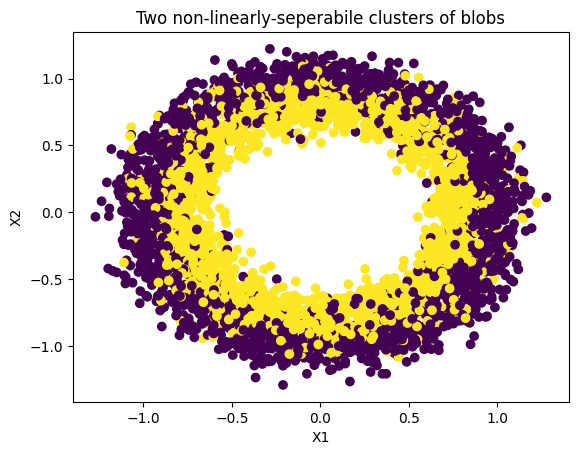

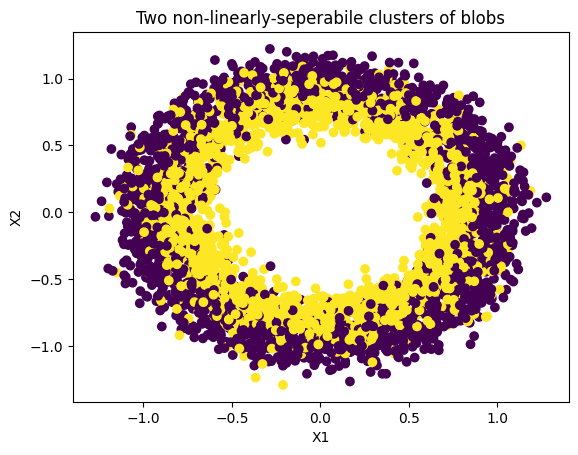

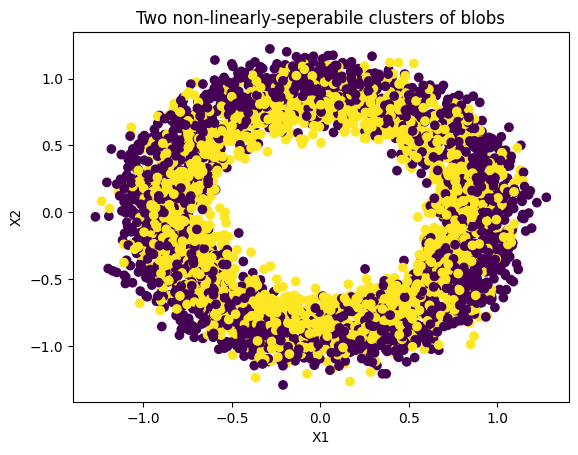

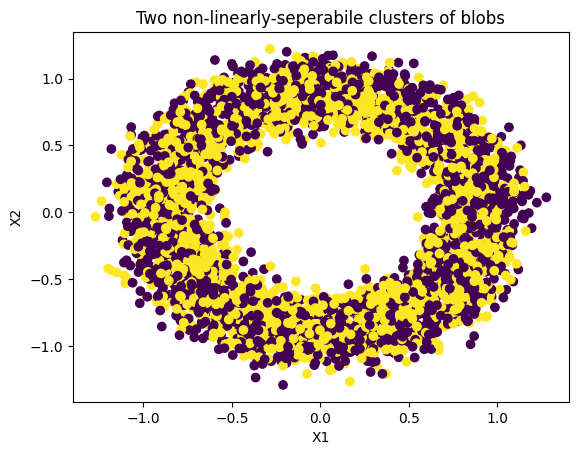

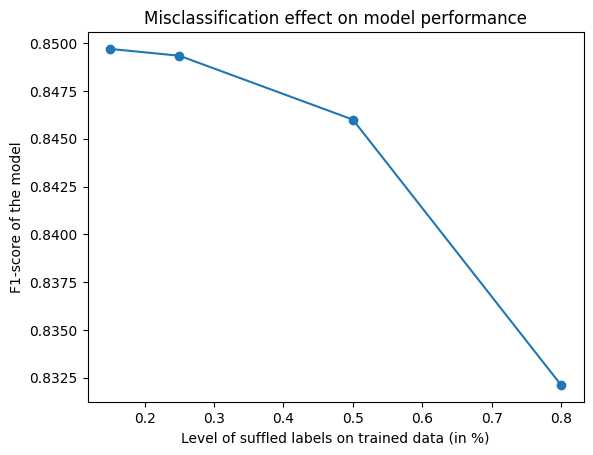

In [ ]:
def randomizing_class_label(random_level = 0):
    if random_level > 1:
        return
    X, y = datasets.make_circles(5000, noise=0.1, random_state=123)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Shuffle a fraction of `y_train`
    y_train_shuffled = copy.deepcopy(y_train)  # Ensure it is writabl

    # Determine number of items to shuffle
    number_of_items_to_shuffle = int(len(y_train_shuffled) * random_level)
    indices_to_shuffle = np.random.choice(len(y_train_shuffled), number_of_items_to_shuffle, replace=False)

    # Shuffle the labels at the specified indices
    y_train_shuffled[indices_to_shuffle] = np.random.permutation(y_train_shuffled[indices_to_shuffle])

    new_model = SVC(kernel='rbf')
    new_model.fit(X_train, y_train_shuffled)

    #split samples according to binarry classification
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train_shuffled)
    plt.title('Two non-linearly-seperabile clusters of blobs')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

    y_predict = new_model.predict(X_test)
    f1 = f1_score(y_test, y_predict)
    return np.mean(f1)

random_levels = [0.15, 0.25, 0.5, 0.8]
f1_scores = []
for random_level in random_levels:
    f1_scores.append(randomizing_class_label(random_level))

plt.title('Misclassification effect on model performance')
plt.xlabel('Level of suffled labels on trained data (in %)')
plt.ylabel('F1-score of the model')
plt.plot(random_levels,f1_scores, marker='o', linestyle='-')
plt.show()

### Conclusion: 
The model ability to predict (classify currectly) the data was greater in 25% shuffeled vs 15%, probably the reason was that introducing randomness in some level increased the ability of the model to generalize over new data - less overfitted \
but when too much noise intreduced, the model ability to classify currectly reduced drasticly - more underfitting.

### Higher vs Lower dimensions

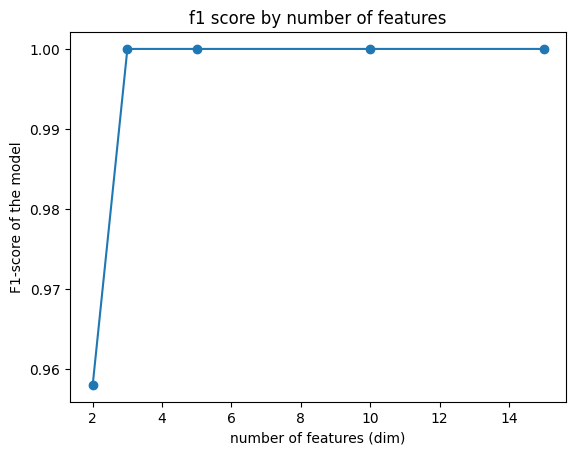

In [75]:
dim_list = [2, 3, 5, 10, 15]
def svm_performance_analysis(dim = 2, cluster_std=1):
    X, y = datasets.make_blobs(n_samples=5000, n_features=dim, cluster_std=cluster_std, random_state=123)
    # train test split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    # Shuffle a fraction of `y_train`

    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return f1_score(y_test, y_predict, average='weighted')

dim_scores = []
for dim in dim_list:
    dim_scores.append(svm_performance_analysis(dim))


plt.title('f1 score by number of features')
plt.xlabel('number of features (dim)')
plt.ylabel('F1-score of the model')
plt.plot(dim_list,dim_scores, marker='o', linestyle='-')
plt.show()



### How does a change in the std of the clusters effect f1-scores (above results)

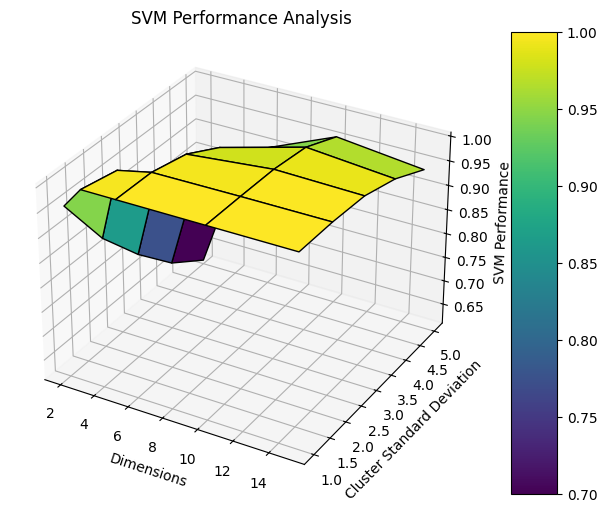

In [ ]:

dim_list = [2, 3, 5, 10, 15]
cluster_stds_list = [1, 2, 3, 4, 5]
# Create the mesh grid
D, C = np.meshgrid(dim_list, cluster_stds_list, indexing='ij')

# Compute Z values
Z = np.zeros_like(D, dtype=float)
for d_idx, dim in enumerate(dim_list):
    for c_idx, cluster_std in enumerate(cluster_stds_list):
        Z[d_idx, c_idx]=svm_performance_analysis(dim, cluster_std)

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot
surf = ax.plot_surface(D, C, Z, cmap='viridis', edgecolor='k')

# Label axes
ax.set_xlabel('Dimensions')
ax.set_ylabel('Cluster Standard Deviation')
ax.set_zlabel('SVM Performance')
ax.set_title('SVM Performance Analysis')

# Add color bar
fig.colorbar(surf, shrink=0.7, aspect=10)

plt.show()

KeyboardInterrupt: 

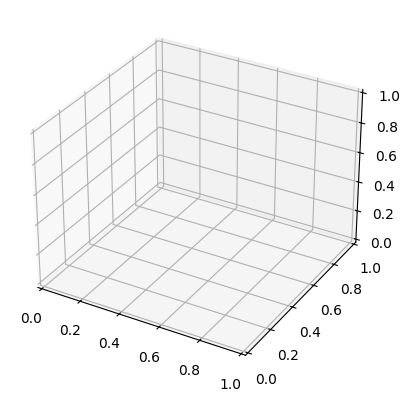

In [73]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

### Conclusion:
Increase in features (dim) results in increase in f1-score \
2-5 are is the range with the biggest slope, when higher then 5 getting closer and closer to 100%.

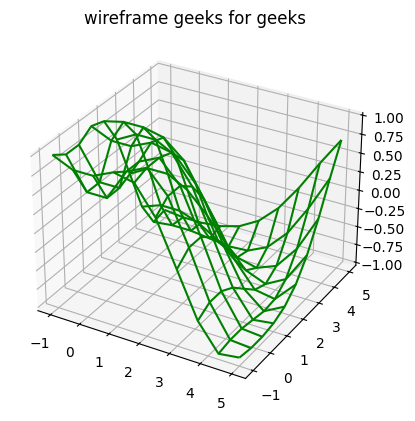

In [74]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# function for z axis
def f(x, y):
    a = np.sin(np.sqrt(x ** 2 + y ** 2))
    return np.sin(np.sqrt(x ** 2 + y ** 2))

# x and y axis
x = np.linspace(-1, 5, 10)
y = np.linspace(-1, 5, 10)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, Y, Z, color ='green')
ax.set_title('wireframe geeks for geeks');
